<a href="https://colab.research.google.com/github/flaviarbatista/Assignments/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Introduction to Artificial Intelligence**
### **Name:** Flavia Batista
### **Course:** Data Analytics and Business Intelligence Analyst
### **Institution:** Willis College

## Set Up Git

In [1]:
!apt-get install -y git
!git config --global user.email "flavia.bi.progress@gmail.com"
!git config --global user.name "flaviarbatista"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [2]:
import getpass, os
token = getpass.getpass('Token')
os.environ['GHTOKEN'] = token

Token··········


## Revision of previous assignment

## **File Read Write operation**
- Read data in different formats from different types of sources
  - files (csv, tsv, xlsx, json)
  - Write dataframe output to different file format


```
!!! Remember to upload the files from the dataset folder into your colab session or you mount the drive to access the files directly (recommended)

```



```
Python

from google.colab import drive
drive.mount('/content/drive')
```





## Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Inspect


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks"

csv_mindex.csv	ex2.csv  ex5.csv  Lab_5.ipynb			    test.tsv
ex1.xlsx	ex4.csv  ex6.csv  London_Borough_Excluding_MHW.shp  tseries.csv


## Clone the Repository

In [5]:
!git clone https://github.com/flaviarbatista/Assignments.git

Cloning into 'Assignments'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 100 (delta 59), reused 89 (delta 55), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 148.32 KiB | 1.19 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [6]:
#@title ### **Some cells have the hidden codes. Try writing the code before revealing**
print("hello world")

hello world




---



### **Read files (csv, tsv, xlsx, json)**

In [7]:
#@title  Import Libraries

import numpy as np
import pandas as pd
np.set_printoptions(precision=4) #optional setting

In [8]:
#@title  Read file 'ex1.csv'
import pandas as pd

draft1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ex1.xlsx')    # Supply the file name (path) to ex1

draft1.head(4)

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [9]:
#@title  Read file 'test.tsv'

draft2 = pd.read_table('/content/drive/MyDrive/Colab Notebooks/test.tsv')  # Read a tsv into a DataFrame

draft2.head()

,test,test,test.1,test.2,test.3
sudh,sudh,sudh,sudh,sudh,sudh
kumar,kumar,kumar,kumar,kumar,kumar


In [10]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ex1.xlsx')
df

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [11]:
pd.read_table('/content/drive/MyDrive/Colab Notebooks/ex2.csv', sep=',')

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [12]:
#@title  Read file 'ex2.csv' with header = None

pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex2.csv', header=None)


,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [13]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex2.csv', names=['asdfdsfs','fsdf', 'b', 'c', 'sudh', 'message'])
type(df)

pandas.core.frame.DataFrame

In [14]:
!cat "/content/drive/MyDrive/Colab Notebooks/csv_mindex.csv" # Showing contents of the file

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [15]:
#@title  Read file 'csv_mindex.csv' with index_col set
parsed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [16]:
!cat "/content/drive/MyDrive/Colab Notebooks/ex4.csv"
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex4.csv', skiprows=[0, 2, 3])

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [17]:
!cat "/content/drive/MyDrive/Colab Notebooks/ex5.csv"
result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex5.csv')
result
pd.isnull(result)

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [18]:
#@title  Read file 'ex5.csv' with na_values set to 'NULL'

result = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [19]:
url = "http://www.basketball-reference.com/leagues/NBA_2015_totals.html"

BB_data = pd.read_html(url)         # Read data from the specified url

BB_data[0].iloc[:, 0:20].head(5)      # Check 5 rows (10 columns only)

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA
0,1.0,James Harden,25.0,HOU,SG,81.0,81.0,2981.0,647.0,1470.0,0.440,208.0,555.0,0.375,439.0,915.0,0.480,0.511,715.0,824.0
1,2.0,Stephen Curry,26.0,GSW,PG,80.0,80.0,2613.0,653.0,1341.0,0.487,286.0,646.0,0.443,367.0,695.0,0.528,0.594,308.0,337.0
2,3.0,Russell Westbrook,26.0,OKC,PG,67.0,67.0,2302.0,627.0,1471.0,0.426,86.0,288.0,0.299,541.0,1183.0,0.457,0.455,546.0,654.0
3,4.0,LeBron James,30.0,CLE,SF,69.0,69.0,2493.0,624.0,1279.0,0.488,120.0,339.0,0.354,504.0,940.0,0.536,0.535,375.0,528.0
4,5.0,Damian Lillard,24.0,POR,PG,82.0,82.0,2925.0,590.0,1360.0,0.434,196.0,572.0,0.343,394.0,788.0,0.500,0.506,344.0,398.0


In [20]:
#@title  Read csv file from url "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"

titanic_train = pd.read_csv("https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv",
                           sep=',')

In [21]:
# @title Display top 10 rows of the dataframe
titanic_train.head(10)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
# @title Display top 5 rows of the 'Names' and 'Pclass' columns
titanic_train[["Name","Pclass"]].head()

,Name,Pclass
0,Mr. Owen Harris,3
1,Mrs. John Bradley (Florence Briggs Thayer),1
2,Miss. Laina,3
3,Mrs. Jacques Heath (Lily May Peel),1
4,Mr. William Henry,3


In [23]:
chunk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ex6.csv', chunksize=1000)
chunk

In [24]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('/content/drive/MyDrive/Colab Notebooks/tseries.csv')
!cat "/content/drive/MyDrive/Colab Notebooks/tseries.csv"

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


## **Exploratory Data Analysis with Visualisation**

- Random generated floats
- Aggregation : Cummulative Sum
- Generate Descriptive Statistics (Describe)
- Plot simple line graphs, bar charts on different publicly available datasets
- Other visualisations
- Distributions and scatter plots
- Geodataframe For Maps

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from numpy.random import randn, randint, uniform, sample

In [27]:
# Create dataframe df and series ts using randn method.
# we will perform different EDAs & visualisations on the dataframes

df = pd.DataFrame(randn(1000), index = pd.date_range('2019-06-07', periods = 1000), columns=['value'])
ts = pd.Series(randn(1000), index = pd.date_range('2019-06-07', periods = 1000))
df.head()

,value
2019-06-07,-0.928834
2019-06-08,1.231307
2019-06-09,0.262011
2019-06-10,0.588474
2019-06-11,-0.489399


In [28]:
df['value'] = df['value'].cumsum() # What is cumsum here?
df.head()

,value
2019-06-07,-0.928834
2019-06-08,0.302473
2019-06-09,0.564484
2019-06-10,1.152958
2019-06-11,0.663559


In [29]:
ts = ts.cumsum()
ts.head()

,0
2019-06-07,0.557572
2019-06-08,-1.351462
2019-06-09,0.381413
2019-06-10,2.414336
2019-06-11,2.944714


In [30]:
type(df), type(ts)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

<Axes: >

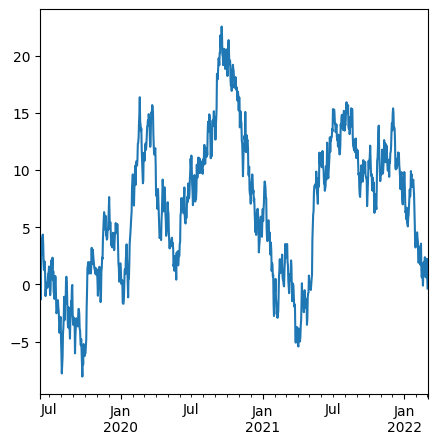

In [31]:
ts.plot(figsize=(5,5))

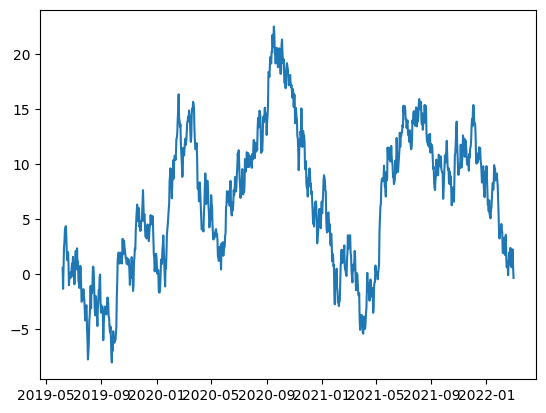

In [32]:
plt.plot(ts)

<Axes: >

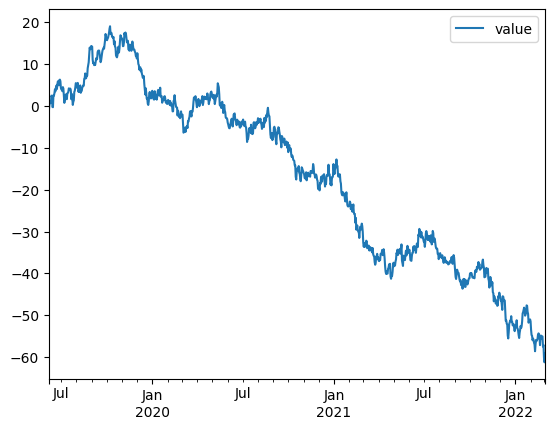

In [33]:
df.plot()

In [34]:
# Load Iris Dataset from seaborn alias sns

iris = sns.load_dataset('iris') # Publicly available dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Y Axis')

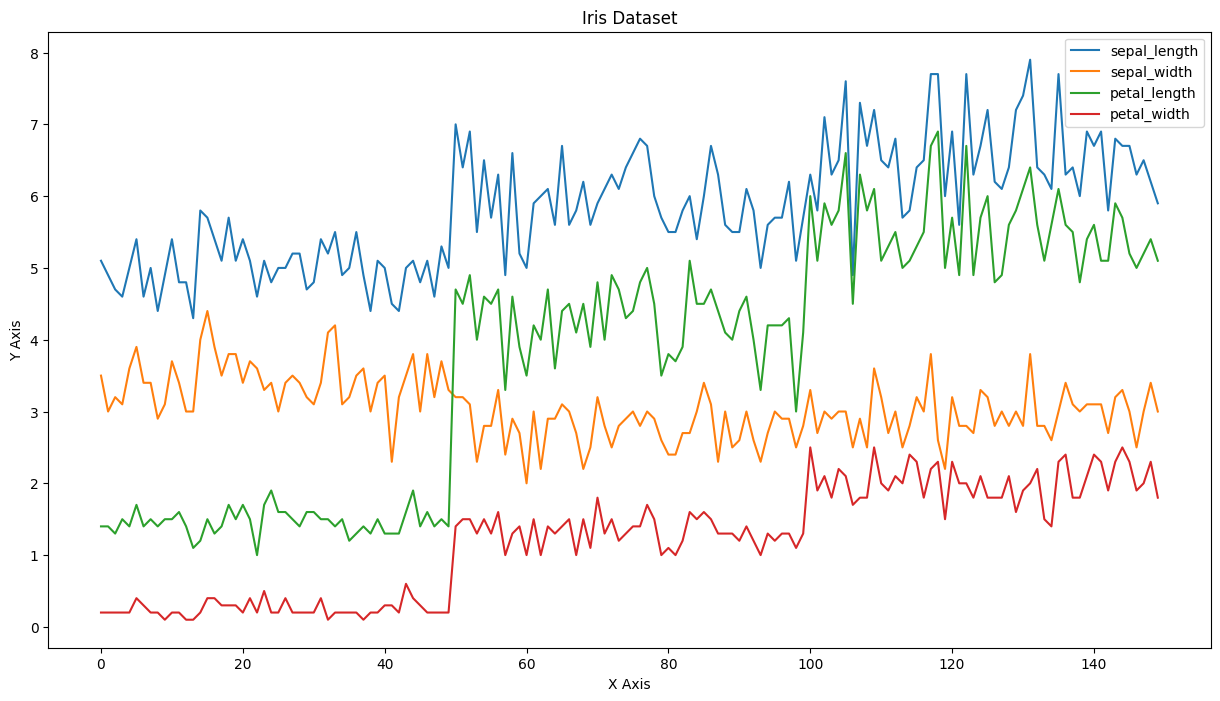

In [35]:
#  line plot of all columns in the DataFrame against the index

ax = iris.plot(figsize=(15,8), title='Iris Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

<Axes: >

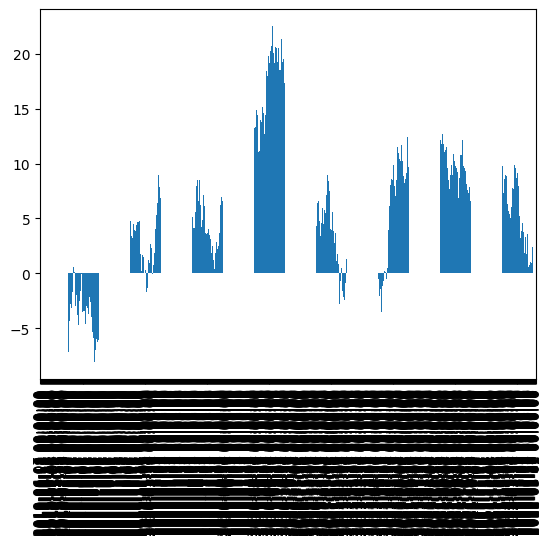

In [36]:
ts.plot(kind = 'bar')

In [37]:
df = iris.drop(['species'], axis = 1)

In [38]:
df.iloc[0]

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2


<Axes: >

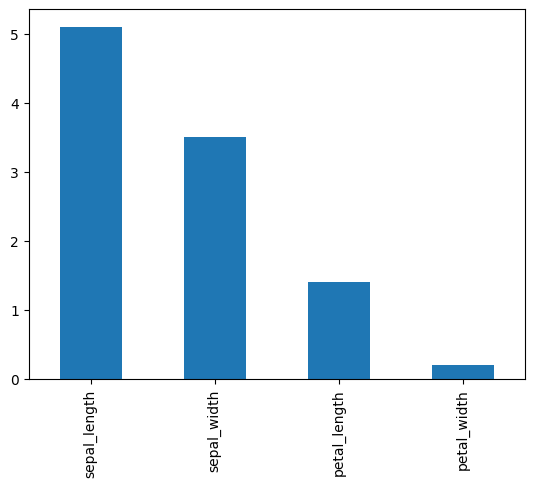

In [39]:
df.iloc[0].plot(kind='bar')

<Axes: >

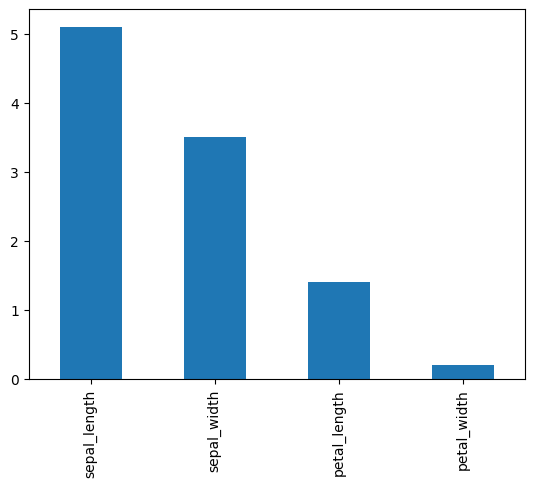

In [40]:
df.iloc[0].plot.bar()

In [41]:
titanic = sns.load_dataset('titanic')

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

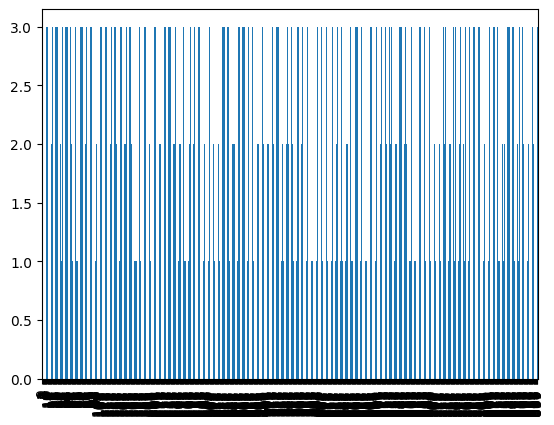

In [43]:
titanic['pclass'].plot(kind = 'bar') # bar plot

In [44]:
df = pd.DataFrame(randn(10, 4), columns=['a', 'b', 'c', 'd'])
df.head(10)

,a,b,c,d
0,0.750250,1.282357,-1.488883,0.841286
1,-0.402258,-0.709278,-0.611339,-0.384664
2,1.171534,0.583170,1.184684,-1.352325
3,0.927989,-2.091468,0.298140,0.448804
4,-0.186063,1.541769,-0.198613,-0.535728
5,0.296248,0.381560,0.153063,0.243379
6,0.683650,0.325278,0.868382,0.489048
7,-0.967593,-0.174821,-0.441149,0.477226
8,-1.177276,-0.595869,2.813804,0.933122
9,-0.974547,1.660260,0.178744,0.302441


<Axes: >

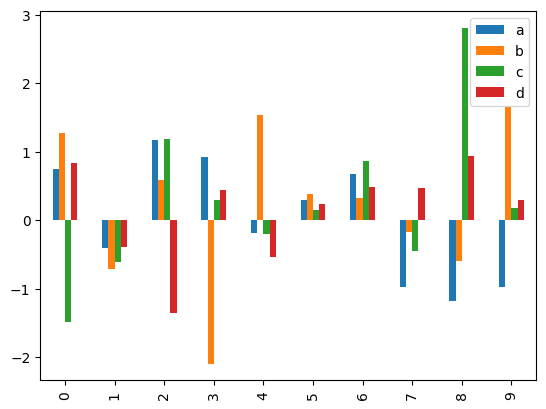

In [45]:
df.plot.bar()

<Axes: >

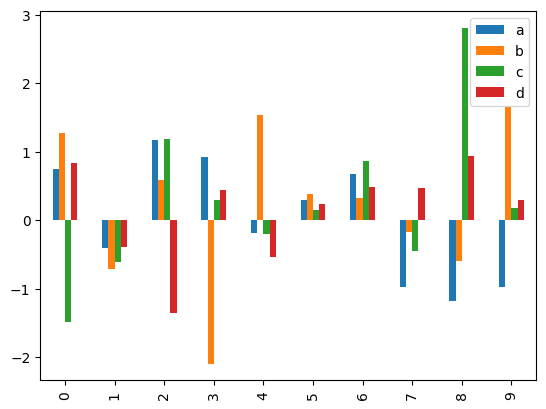

In [46]:
df.plot(kind = 'bar')

<Axes: >

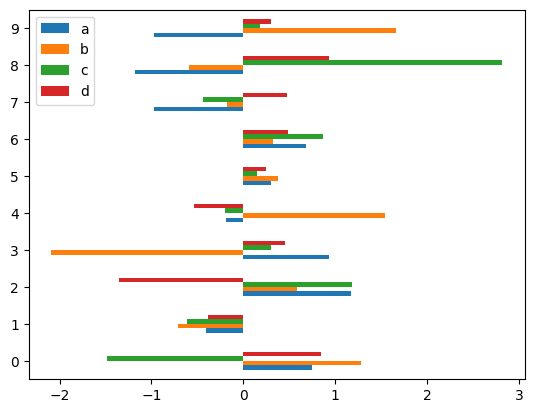

In [47]:
df.plot.barh() # horizontal

<Axes: ylabel='Frequency'>

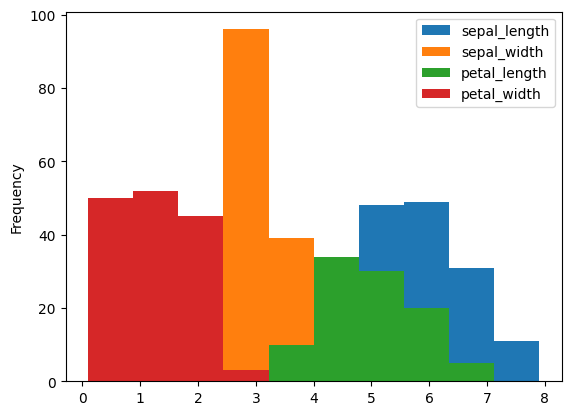

In [48]:
iris.plot.hist()

<Axes: ylabel='Frequency'>

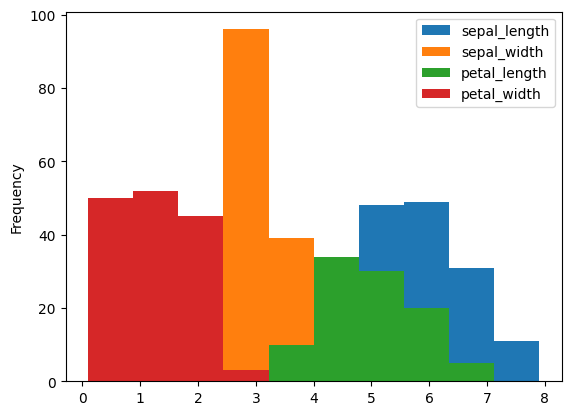

In [49]:
iris.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

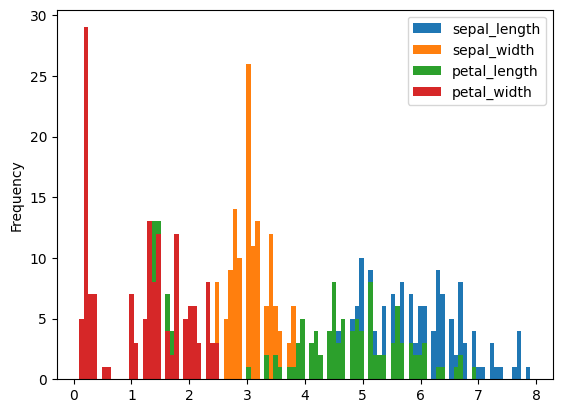

In [50]:
iris.plot(kind = 'hist', stacked = False, bins = 100)

<Axes: xlabel='Frequency'>

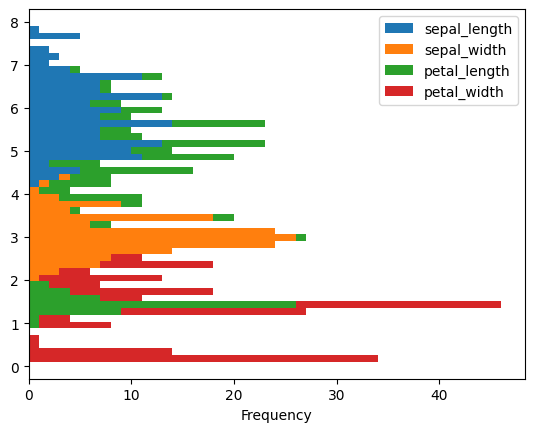

In [51]:
iris.plot(kind = 'hist', stacked = True, bins = 50, orientation = 'horizontal')

In [52]:
iris['sepal_width'].diff()

,sepal_width
0,NaN
1,-0.5
2,0.2
3,-0.1
4,0.5
...,...
145,-0.3
146,-0.5
147,0.5
148,0.4


<Axes: ylabel='Frequency'>

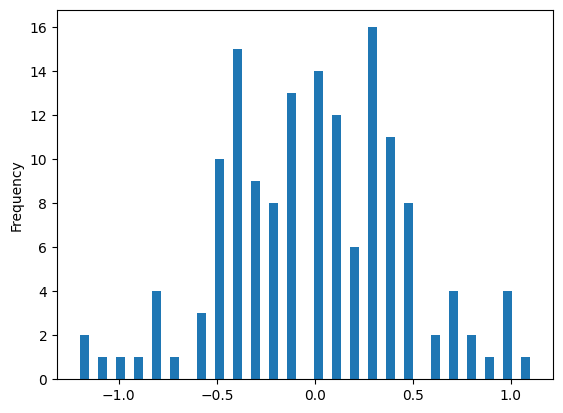

In [53]:
iris['sepal_width'].diff().plot(kind = 'hist', stacked = True, bins = 50)

In [54]:
df = iris.drop(['species'], axis = 1)

# df.diff().head() calculates the difference between
# consecutive rows in the dataframe df
# and displays the first 5 rows of the result.

df.diff().head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,-0.2,-0.5,0.0,0.0
2,-0.2,0.2,-0.1,0.0
3,-0.1,-0.1,0.2,0.0
4,0.4,0.5,-0.1,0.0


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

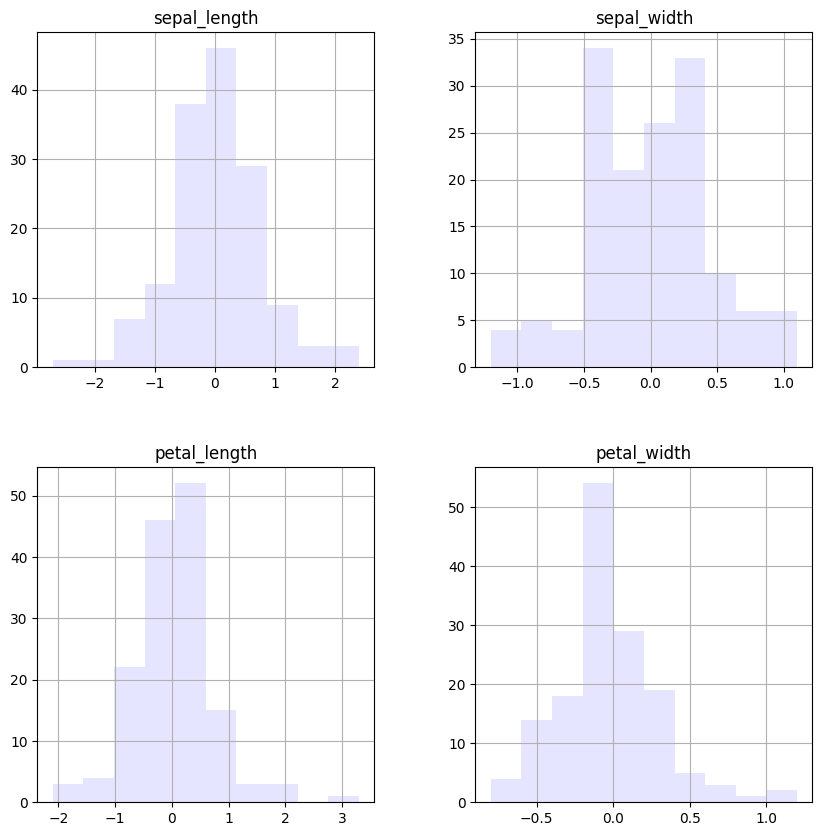

In [55]:
df.diff().hist(color = 'b', alpha = 0.1, figsize=(10,10))

In [56]:
color = {'boxes': 'DarkGreen', 'whiskers': 'b'}
color

{'boxes': 'DarkGreen', 'whiskers': 'b'}

<Axes: xlabel='sepal_length', ylabel='petal_length'>

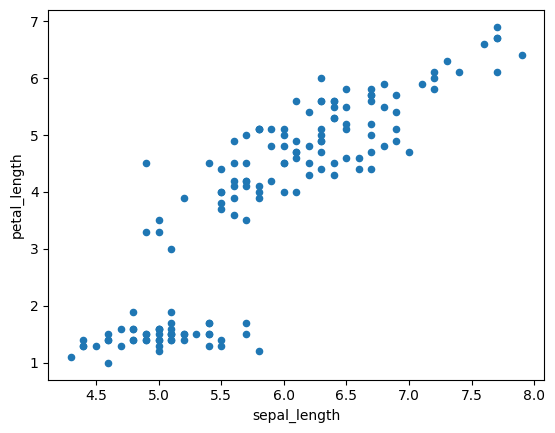

In [57]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

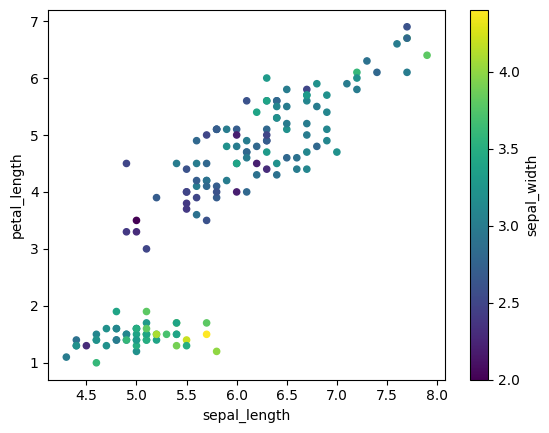

In [58]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width')

In [59]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


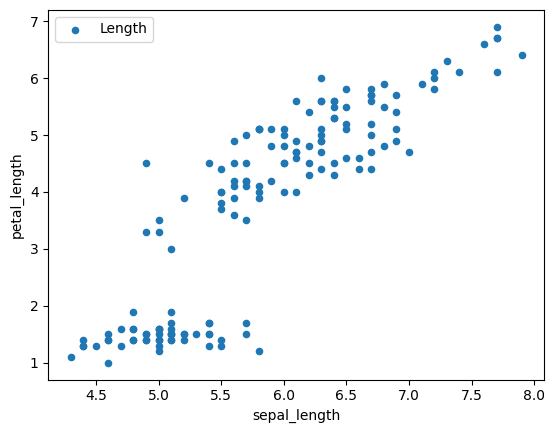

In [60]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length', label = 'Length');
#df.plot.scatter(x = 'sepal_width', y = 'petal_width', label = 'Width', ax = ax, color = 'r')
#df.plot.scatter(x = 'sepal_width', y = 'petal_length', label = 'Width', ax = ax, color = 'g')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

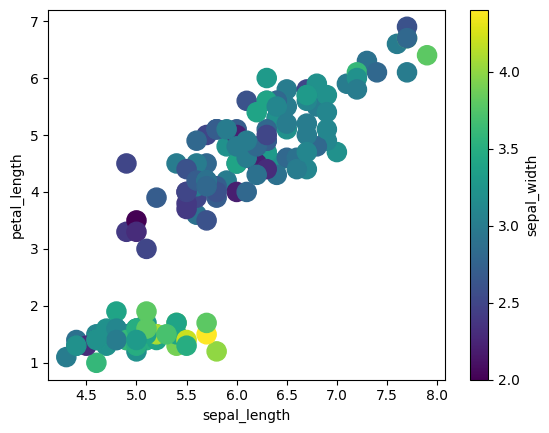

In [61]:
df.plot.scatter(x = 'sepal_length', y = 'petal_length', c = 'sepal_width', s = 190)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

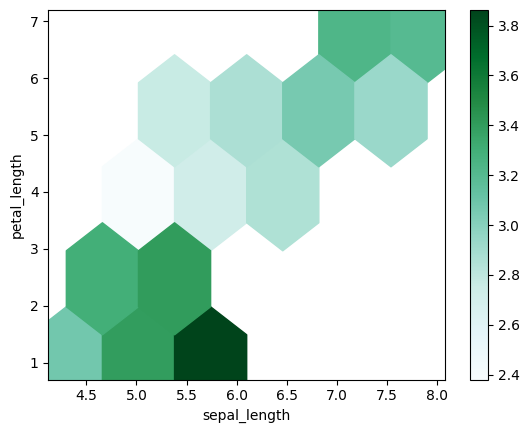

In [62]:
df.plot.hexbin(x = 'sepal_length', y = 'petal_length', gridsize = 5, C = 'sepal_width')

In [63]:
d = df.iloc[0]
d

,0
sepal_length,5.1
sepal_width,3.5
petal_length,1.4
petal_width,0.2


<Axes: ylabel='0'>

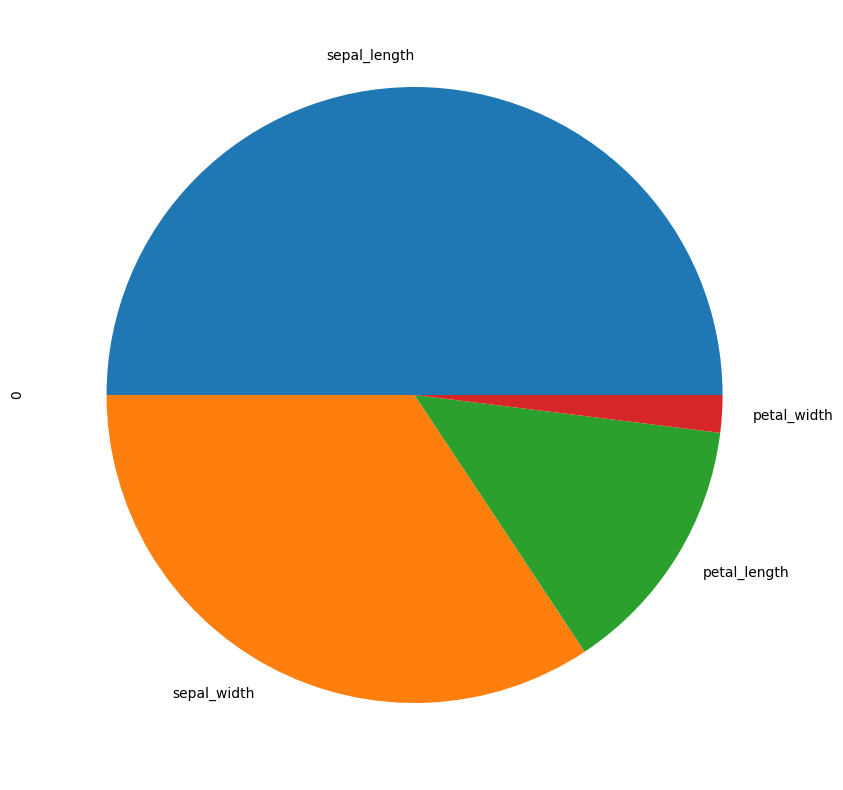

In [64]:
d.plot.pie(figsize = (10,10))

In [65]:
d = df.head(3).T

In [66]:
d

,0,1,2
sepal_length,5.1,4.9,4.7
sepal_width,3.5,3.0,3.2
petal_length,1.4,1.4,1.3
petal_width,0.2,0.2,0.2


array([<Axes: ylabel='0'>, <Axes: ylabel='1'>, <Axes: ylabel='2'>],
      dtype=object)

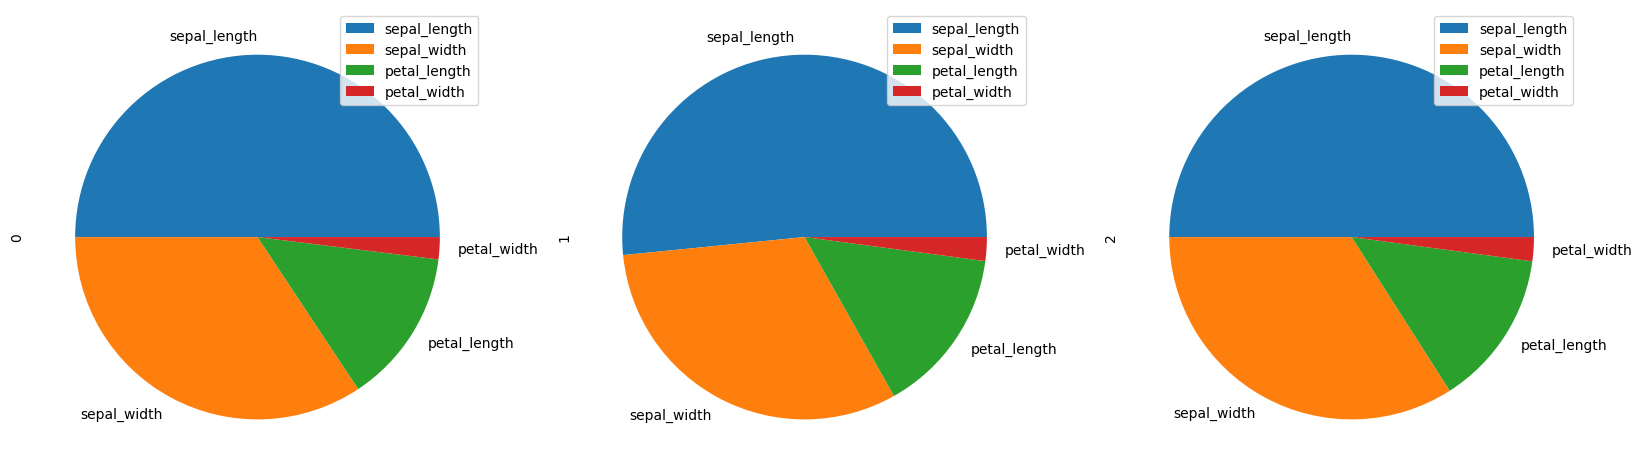

In [67]:
d.plot.pie(subplots = True, figsize = (20, 20))

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>, <Axes: ylabel='2'>],
      dtype=object)

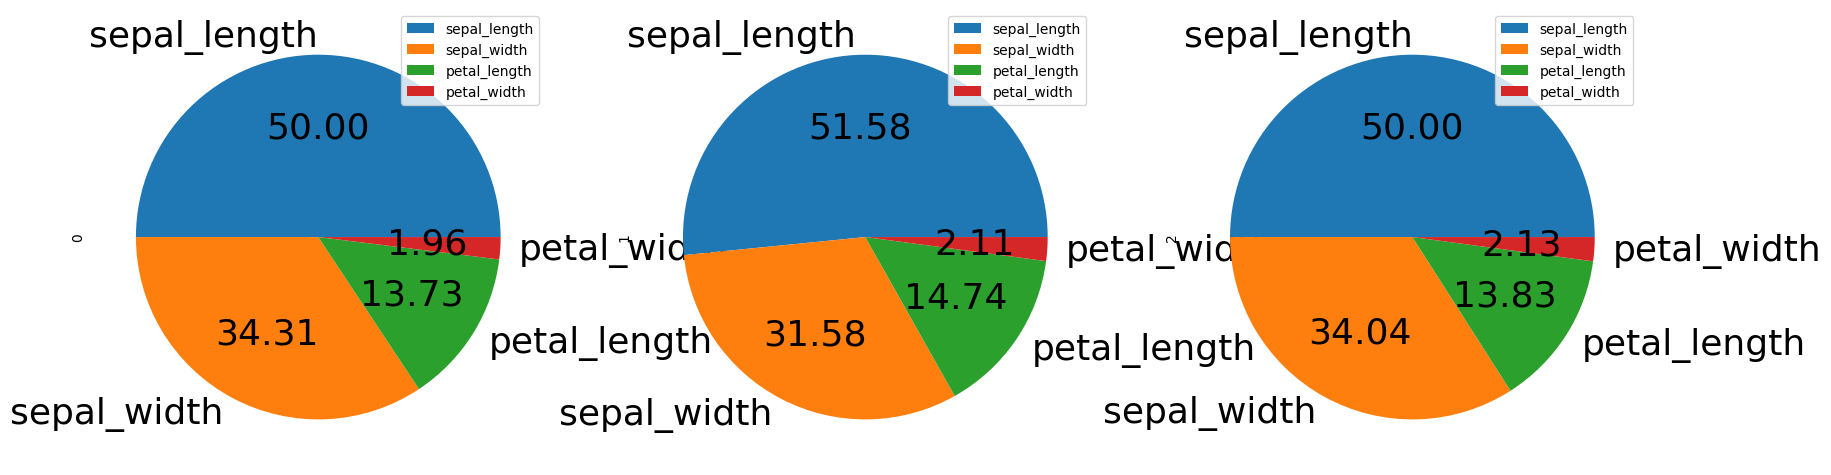

In [68]:
d.plot.pie(subplots = True, figsize = (20, 20), fontsize = 26, autopct = '%.2f')

In [69]:
[0.1]*4

[0.1, 0.1, 0.1, 0.1]

<Axes: ylabel='Pie Plot'>

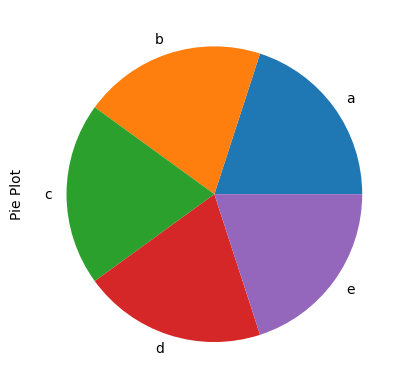

In [70]:
series = pd.Series([0.2]*5, index = ['a','b','c', 'd','e'], name = 'Pie Plot')
series.plot.pie()

In [71]:
from pandas.plotting import scatter_matrix

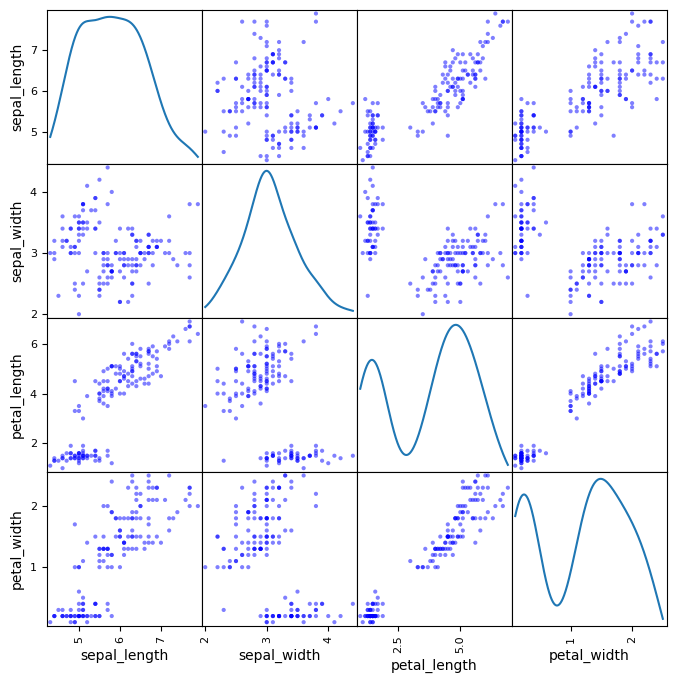

In [72]:
scatter_matrix(df, figsize= (8,8), diagonal='kde', color = 'b')
plt.show()

<Axes: ylabel='Density'>

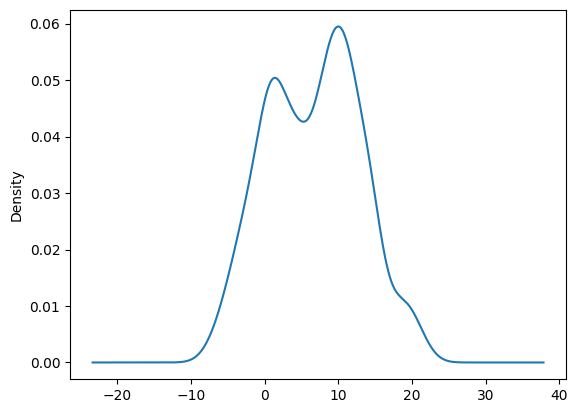

In [73]:
ts.plot.kde()

In [74]:
from pandas.plotting import andrews_curves

<Axes: >

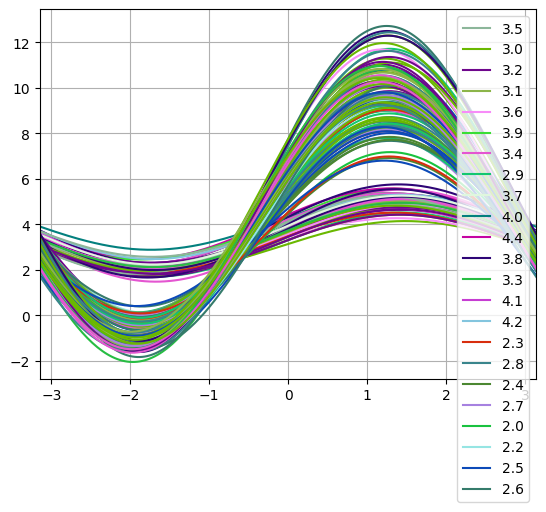

In [75]:
andrews_curves(df, 'sepal_width')

<Axes: >

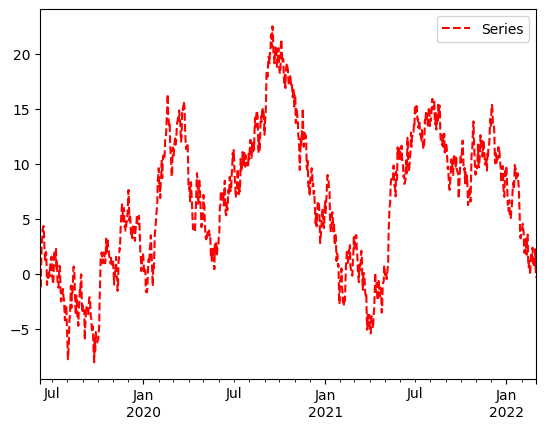

In [76]:
ts.plot(style = 'r--', label = 'Series', legend = True)

<Axes: >

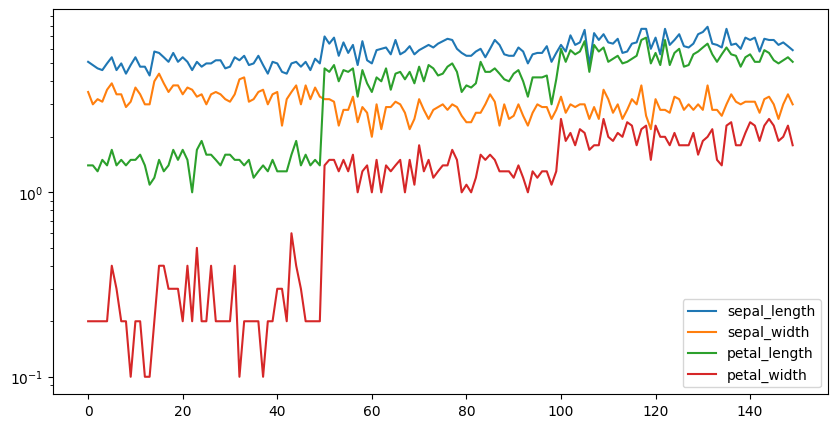

In [77]:
df.plot(legend = True, figsize = (10, 5), logy = True)

In [78]:
df.head(0)

,sepal_length,sepal_width,petal_length,petal_width


In [79]:
x = df.drop(['sepal_width', 'petal_width'], axis = 1)
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [80]:
y = df.drop(['sepal_length', 'petal_length'], axis = 1)
y.head()

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


<Axes: >

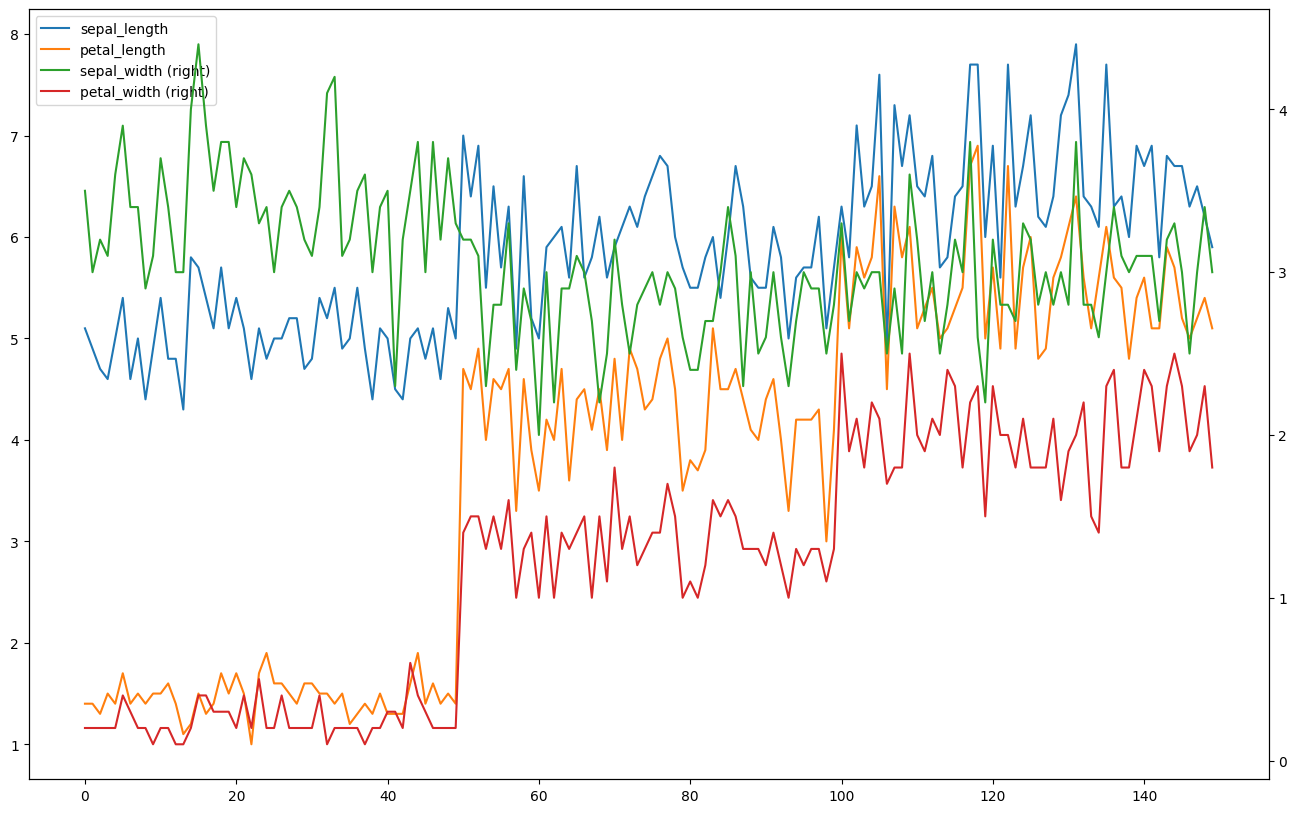

In [81]:
ax = x.plot()
y.plot(figsize = (16,10), secondary_y=True, ax = ax)

<Axes: >

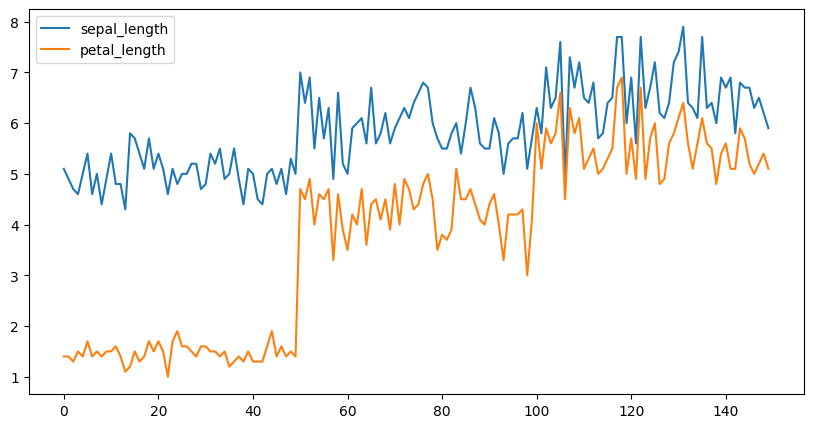

In [82]:
x.plot(figsize=(10,5), x_compat = True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

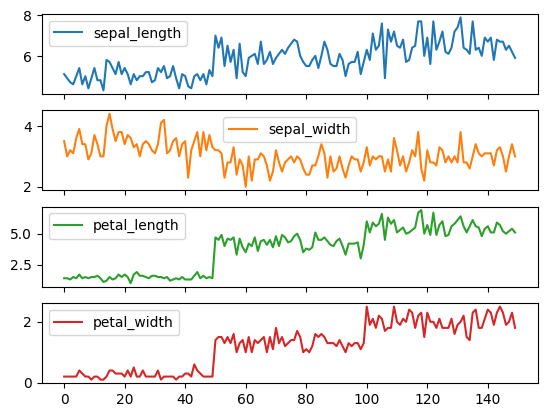

In [83]:
df.plot(subplots = True)


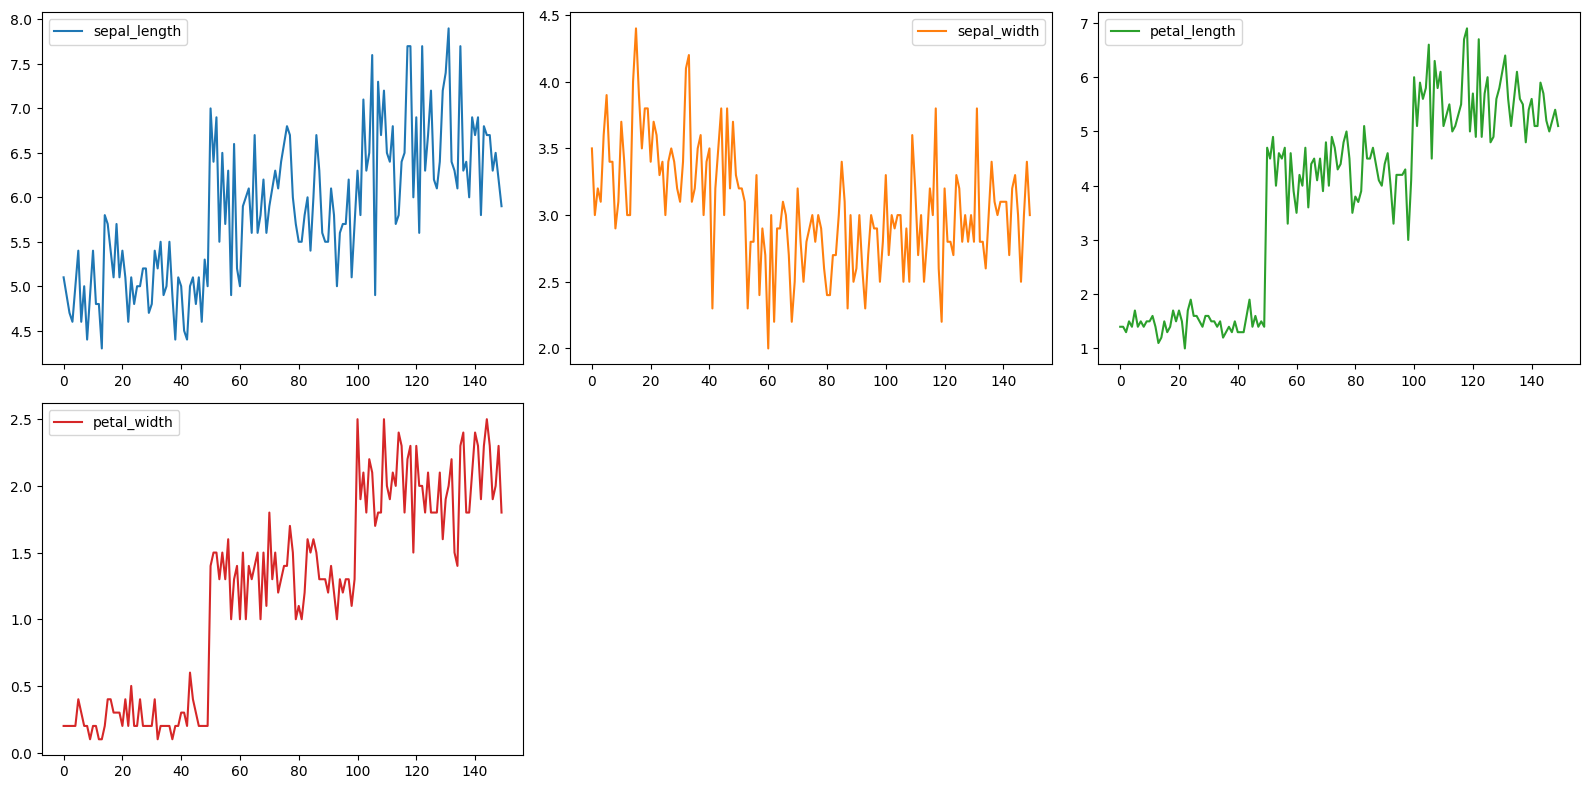

In [84]:
df.plot(subplots = True, sharex = False, layout = (2,3), figsize = (16,8))
plt.tight_layout()

In [86]:
!pip install descartes

In [87]:
from descartes import PolygonPatch

In [88]:
import geopandas as gpd

In [89]:
!pip install -q pyshp shapely

<Axes: >

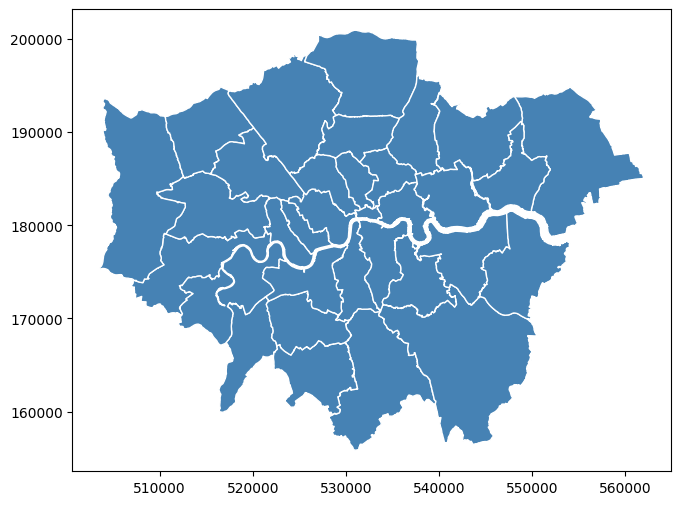

In [90]:
import shapefile
from shapely.geometry import shape
shp_path = "/content/drive/MyDrive/Colab Notebooks/London_Borough_Excluding_MHW.shp"
map_df = gpd.GeoDataFrame(geometry=[shape(s.__geo_interface__) for s in shapefile.Reader(shp_path).shapes()])
map_df.plot(figsize=(8,6), color='steelblue', edgecolor='white')
#map_df = gpd.read_file("London_Borough_Excluding_MHW.shp")
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df.head()
#map_df.plot()

In [91]:
map_df

,geometry
0,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."
5,"POLYGON ((549893.9 181459.8, 549894.6 181465.7..."
6,"POLYGON ((510599.8 191689.5, 510615.2 191591.3..."
7,"POLYGON ((510599.8 191689.5, 510660 191690.9, ..."
8,"POLYGON ((525201 182512.6, 525181.5 182521.1, ..."
9,"POLYGON ((524579.9 198355.2, 524594.3 198321.4..."


## Commit and Push Changes

In [92]:
%cd /content/Assignments

/content/Assignments


In [93]:
!git add --all

In [94]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [95]:
!git commit -m "Complete Lab_5"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [96]:
!git checkout

Your branch is up to date with 'origin/main'.


In [97]:
!git push https://$GHTOKEN@github.com/flaviarbatista/Assignments.git main

Everything up-to-date


In [98]:
os.environ.pop('GHTOKEN', None)
print("GHTOKEN removed from the session.")

GHTOKEN removed from the session.
